In [1]:
#import chosen libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)

In [3]:
#calculate crash percentage for each number of engines
AC_engines = df["Number.of.Engines"].value_counts()
ENG_total = AC_engines.sum()
AC_ENG_percentage = (AC_engines / ENG_total * 100).sort_values()

In [4]:
#create a new DF for crash percentages
ENG_num_data = AC_ENG_percentage.reset_index()
ENG_num_data.columns= ['Num_Engines', 'Crash_Percentage']
ENG_num_data = ENG_num_data.sort_values('Num_Engines', ascending=True)

In [5]:
#calculate diminishing risk per extra engine
prev_percentage = 0
diminishing_risk = []
for index, row in ENG_num_data.iterrows():
    engines = row["Num_Engines"]
    percentage = row["Crash_Percentage"]
    diminishing_return = prev_percentage - percentage
    diminishing_risk.append((engines, diminishing_return))
    prev_percentage = percentage

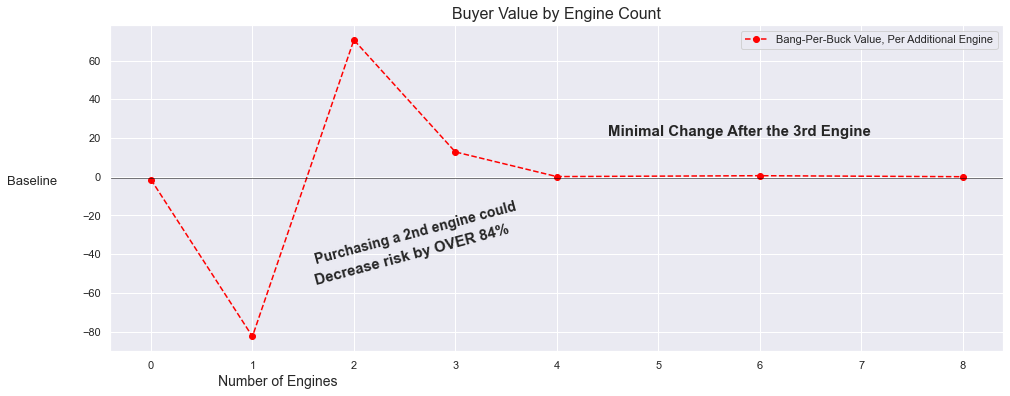

In [6]:
sns.set()
#this code creates a plot that visualizes change in 'diminishing value' for increasing engine count
x = [engines for engines, diminishing_return in diminishing_risk]
y = [diminishing_return for engines, diminishing_return in diminishing_risk]
plt.figure(figsize=(16, 6))
plt.plot(x, y, marker="o", linestyle="--", color="red", label="Bang-Per-Buck Value, Per Additional Engine")
plt.axhline(-0.5, color="black", linestyle="-", linewidth=0.5)
plt.text(1.6, -45, "Purchasing a 2nd engine could", fontsize=14, rotation=15, fontweight='bold')
plt.text(1.6, -56, "Decrease risk by OVER 84%", fontsize=15, rotation=15, fontweight='bold')
plt.text(4.5, 21, "Minimal Change After the 3rd Engine", fontsize=15, fontweight='bold')

plt.xlabel("Number of Engines", fontsize=14, ha='left', x=.12)
plt.ylabel("Baseline", fontsize=13, rotation=0, labelpad=50)
plt.title("Buyer Value by Engine Count", fontsize=16)
plt.legend()
plt.show()

In [7]:
#makes a new DF, to filter and rename columns for injury organizing
Injuries = df.loc[:, ['Number.of.Engines', 'Engine.Type', 'Total.Uninjured', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Purpose.of.flight']]
Injuries['Engine.Type'].replace(['nan', 'Unknown', 'None', 'NONE', 'UNK'], 'NaN', inplace=True)
Injuries.rename(columns={'Total.Fatal.Injuries': 'Fatalities'}, inplace=True)

In [8]:
# fill NaN values, then calculate total survivors
Injuries['Total.Uninjured'] = Injuries['Total.Uninjured'].fillna(0)
Injuries['Total.Serious.Injuries'] = Injuries['Total.Serious.Injuries'].fillna(0)
Injuries['Total.Minor.Injuries'] = Injuries['Total.Minor.Injuries'].fillna(0)

Injuries['Survivors'] = Injuries['Total.Uninjured'] + Injuries['Total.Serious.Injuries'] + Injuries['Total.Minor.Injuries']
Injuries.drop(['Total.Uninjured', 'Total.Serious.Injuries', 'Total.Minor.Injuries'], axis=1, inplace=True)

In [9]:
#create 5 new DFs by filtering individual engine types
reciprocating_data = Injuries[Injuries['Engine.Type'] == 'Reciprocating']
turbo_fan_data = Injuries[Injuries['Engine.Type'] == 'Turbo Fan']
turbo_jet_data = Injuries[Injuries['Engine.Type'] == 'Turbo Jet']
turbo_prop_data = Injuries[Injuries['Engine.Type'] == 'Turbo Prop']
turbo_shaft_data = Injuries[Injuries['Engine.Type'] == 'Turbo Shaft']

In [10]:
#this code expands on 'turbo_fan_data', creating a new DF that can be used to calculate survival %
turbo_fan_CLEAN = turbo_fan_data[['Engine.Type', 'Survivors', 'Fatalities']].copy()
surv_TEMP = ['Survivors', 'Fatalities']

#this code loops through each column in 'surv_TEMP' and replaces any 0 values with NaN in the 
for col in surv_TEMP:
    turbo_fan_CLEAN[col] = turbo_fan_CLEAN[col].replace(0, np.nan)
turbo_fan_CLEAN['Survivors'] = turbo_fan_CLEAN['Survivors'].fillna(0)
turbo_fan_CLEAN['Fatalities'] = turbo_fan_CLEAN['Fatalities'].fillna(0)

#then, those results are stored in these 2 variables
total_survivorsF = turbo_fan_CLEAN['Survivors'].sum()
total_fatalitiesF = turbo_fan_CLEAN['Fatalities'].sum()

#this code calculates the total number of survivors and fatalities, then calculates the survival percentage for 
#incidents involving turbo fan engines 'total_survivors' by 'total_result', and multiplying the result by 100.
total_resultF = total_survivorsF + total_fatalitiesF
survival_percentageF = (total_survivorsF / total_resultF) * 100
#the resulting percentage is stored in 'survival_percentageF'

In [11]:
#same, I copy/pasted 'jet' and 'J'
turbo_jet_CLEAN = turbo_jet_data[['Engine.Type', 'Survivors', 'Fatalities']].copy()
surv_TEMP = ['Survivors', 'Fatalities']
for col in surv_TEMP:
    turbo_jet_CLEAN[col] = turbo_jet_CLEAN[col].replace(0, np.nan)
turbo_jet_CLEAN['Survivors'] = turbo_jet_CLEAN['Survivors'].fillna(0)
turbo_jet_CLEAN['Fatalities'] = turbo_jet_CLEAN['Fatalities'].fillna(0)
total_survivorsJ = turbo_jet_CLEAN['Survivors'].sum()
total_fatalitiesJ = turbo_jet_CLEAN['Fatalities'].sum()

total_resultJ = total_survivorsJ + total_fatalitiesJ
survival_percentageJ = (total_survivorsJ / total_resultJ) * 100
survival_percentageJ

97.57422259743915

In [12]:
#same, I copy/pasted 'prop' and 'P'
turbo_prop_CLEAN = turbo_prop_data[['Engine.Type', 'Survivors', 'Fatalities']].copy()
surv_TEMP = ['Survivors', 'Fatalities']
for col in surv_TEMP:
    turbo_prop_CLEAN[col] = turbo_prop_CLEAN[col].replace(0, np.nan)
turbo_prop_CLEAN['Survivors'] = turbo_prop_CLEAN['Survivors'].fillna(0)
turbo_prop_CLEAN['Fatalities'] = turbo_prop_CLEAN['Fatalities'].fillna(0)
total_survivorsP = turbo_prop_CLEAN['Survivors'].sum()
total_fatalitiesP = turbo_prop_CLEAN['Fatalities'].sum()

total_resultP = total_survivorsP + total_fatalitiesP
survival_percentageP = (total_survivorsP / total_resultP) * 100
survival_percentageP

87.76093794681155

In [13]:
#same, I copy/pasted 'shaft' and 'S'
turbo_shaft_CLEAN = turbo_shaft_data[['Engine.Type', 'Survivors', 'Fatalities']].copy()
surv_TEMP = ['Survivors', 'Fatalities']
for col in surv_TEMP:
    turbo_shaft_CLEAN[col] = turbo_shaft_CLEAN[col].replace(0, np.nan)
turbo_shaft_CLEAN['Survivors'] = turbo_shaft_CLEAN['Survivors'].fillna(0)
turbo_shaft_CLEAN['Fatalities'] = turbo_shaft_CLEAN['Fatalities'].fillna(0)
total_survivorsS = turbo_shaft_CLEAN['Survivors'].sum()
total_fatalitiesS = turbo_shaft_CLEAN['Fatalities'].sum()

total_resultS = total_survivorsS + total_fatalitiesS
survival_percentageS = (total_survivorsS / total_resultS) * 100
survival_percentageS

81.83863709418193

In [14]:
#same, I copy/pasted 'reciprocating' and 'R'
reciprocating_CLEAN = reciprocating_data[['Engine.Type', 'Survivors', 'Fatalities']].copy()
surv_TEMP = ['Survivors', 'Fatalities']
for col in surv_TEMP:
    reciprocating_CLEAN[col] = reciprocating_CLEAN[col].replace(0, np.nan)
reciprocating_CLEAN['Survivors'] = reciprocating_CLEAN['Survivors'].fillna(0)
reciprocating_CLEAN['Fatalities'] = reciprocating_CLEAN['Fatalities'].fillna(0)
total_survivorsR = reciprocating_CLEAN['Survivors'].sum()
total_fatalitiesR = reciprocating_CLEAN['Fatalities'].sum()

total_resultR = total_survivorsR + total_fatalitiesR
survival_percentageR = (total_survivorsR / total_resultR) * 100
survival_percentageR

81.7682668208984

In [15]:
#this code combines the previous calcs. by passing a dictionary with column names, and corresponding values
combined_data = pd.DataFrame({'Engine.Type': ['Turbo Fan', 'Turbo Jet', 'Turbo Prop', 'Turbo Shaft', 'Reciprocating'],
    'Survivors': [total_survivorsF, total_survivorsJ, total_survivorsP, total_survivorsS, total_survivorsR],
    'Fatalities': [total_fatalitiesF, total_fatalitiesJ, total_fatalitiesP, total_fatalitiesS, total_fatalitiesR]})

In [16]:
#this code calculates the 'Survival_Percentage' for each engine type by dividing 'Survivors' by ('Survivors' + 'Fatalities' * 100)
combined_data['Survival_Percentage'] = (combined_data['Survivors'] / (combined_data['Survivors'] + combined_data['Fatalities'])) * 100

In [17]:
#this code checks and sotres fatality percentage for each engine, by subtracting 'Survival_Percentage' from 100. EASY!
combined_data['Fatality_Percentage'] = 100 - combined_data['Survival_Percentage']

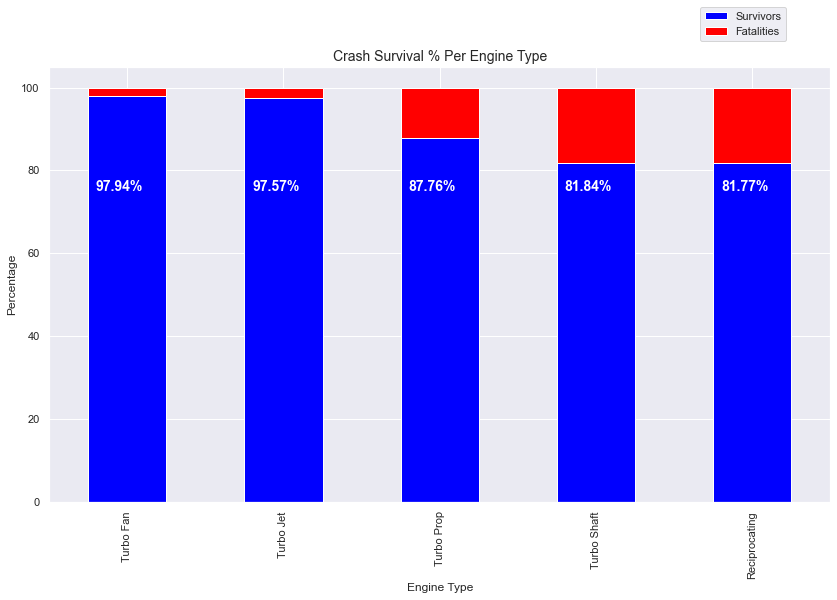

In [18]:
# plot
ax = combined_data.plot(x='Engine.Type', y=['Survival_Percentage', 'Fatality_Percentage'],
kind='bar', stacked=True, color=['blue', 'red'], figsize=(14, 8))

plt.xlabel('Engine Type', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.title('Crash Survival % Per Engine Type', fontsize=14)

plt.text(-.2, 75, "97.94%", fontsize=14, fontweight='bold', color='white')
plt.text(.8, 75, "97.57%", fontsize=14, fontweight='bold', color='white')
plt.text(1.8, 75, "87.76%", fontsize=14, fontweight='bold', color='white')
plt.text(2.8, 75, "81.84%", fontsize=14, fontweight='bold', color='white')
plt.text(3.8, 75, "81.77%", fontsize=14, fontweight='bold', color='white')

ax.legend(["Survivors", "Fatalities"], bbox_to_anchor=(.95, 1.15))
plt.show()